# Data Science Coursework 1
## Task 1: Regression Task
Your first task deals with a modified dataset that we have prepared based on a collection of household
information over various locations across Boston in the US. Each sample in the dataset corresponds to a household
characterised by 18 features, from per capita crime rate to proportion of non-retail business acres in the town of the
household. We will take one of these features (namely, the median value of owner-occupied homes in US$ 1000s)
as the target variable, and we use the other 17 features as predictors

### 1.1 Linear Regression
#### 1.1.1
For the modified Boston housing data set, we first obtain a linear regression model to predict the median value of owner-occupied homes in USD 1000's as our target variable using all the other features as predictors. The parameters of this model are obtained by solving the least-squares optimisation problem as we have seen in lectures. We use the regression_train data to train the linear regression model. We also create a function that calculates the mean squared error (MSE) given by $MSE=\frac{1}{N}(y-\hat{y})^T(y-\hat{y})$ where $\hat{y} = X\beta$ and $N$ is the number of input samples.

In [506]:
# importing packages that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [507]:
# load data as pandas data frames
regression_train = pd.read_csv('regression_train.csv', header=None)
regression_test = pd.read_csv('regression_test.csv', header=None)
regression_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,-0.413447,-0.487722,0.115738,0.115735,0.158124,0.984960,0.797449,-0.773684,0.985161,-0.803212,1.176466,0.441052,-0.983048,0.158124,1.176469,-0.487723,-0.773598,23.9
1,1.0,-0.412788,-0.487722,-1.034027,-1.034035,-0.386091,0.819700,0.207144,-0.418203,0.819617,-0.666608,-0.857929,0.379323,-0.803625,-0.386091,-0.857939,-0.487723,-0.418305,29.9
2,1.0,-0.387983,-0.487722,-0.211099,-0.211084,0.261784,-0.510932,-0.923682,-0.671859,-0.511320,-0.102376,0.344213,0.441052,0.131334,0.261784,0.344218,-0.487727,-0.671863,24.5
3,1.0,-0.347952,-0.487722,-0.720322,-0.720323,-0.412006,0.846768,0.324494,-0.248591,0.846699,-0.601276,-0.488039,0.369674,-0.381702,-0.412006,-0.488023,-0.487722,-0.248524,27.5
4,1.0,-0.330562,-0.487722,-0.437258,-0.437249,-0.144217,0.299699,0.918355,0.313581,0.299802,-0.601276,1.176466,0.342811,0.020597,-0.144217,1.176460,-0.487724,0.313542,18.4


In [508]:
# seperating training data
X_train_r = regression_train.iloc[:,:-1]
y_train_r = regression_train.iloc[:,-1] # target variable

In [509]:
# MSE function
def mse(y_true,y_pred): 
    mse = np.square(np.subtract(y_true,y_pred)).mean()
    return mse

In [510]:
# obtain the parameters of the model using least squares estimate
beta_LS = np.linalg.solve(X_train_r.T @ X_train_r, X_train_r.T @ y_train_r) 
print("Linear Regression Parameters:", beta_LS)

#predicted y using LS estimates
y_pred_in_sample = X_train_r @ beta_LS

# pbtain in-sample MSE
MSE_in_sample_lr = mse(y_train_r,y_pred_in_sample)
print("In-Sample MSE: ", MSE_in_sample_lr)

Linear Regression Parameters: [ 2.25195148e+01 -6.18293420e-01 -4.49311989e+04 -4.00378419e+04
  4.00376826e+04  2.64882498e+04  9.82671278e+02 -1.58321075e-01
  1.37927336e+03 -9.79553269e+02 -5.46855295e-02 -5.67508342e+03
  7.41991610e-01 -3.71807187e+00 -2.64900423e+04  5.67334155e+03
  4.49323309e+04 -1.38276478e+03]
In-Sample MSE:  24.36924679123637


#### 1.1.2
We now use the model on the test data to predict the target variable, and compute the out-of-sample
MSE on the test set. We also compare the out-of-sample and the in-sample MSE.

In [511]:
# seperating test data
X_test_r = regression_test.iloc[:,:-1]
y_test_r = regression_test.iloc[:,-1]

# obtain the pedicted values
y_pred_out_of_sample = X_test_r @ beta_LS

# obtain out-of-sample MSE on test data
MSE_out_of_sample_lr = mse(y_test_r,y_pred_out_of_sample)
print("Out-of-sample MSE:", MSE_out_of_sample_lr)

Out-of-sample MSE: 19.557331360422744


In general, I would expect the in-sample MSE to be less than the out-of-sample MSE. This is because, for in-sample MSE, it is "predicting" the fit of data when we've already constructed the model on that data. The model is well tuned for the training data and hence does well at predicting using it. On the other hand, the data used to test the model is completely different to the one used to build the model. 

In this task, I obtain 24.37 for the in-sample MSE and 19.56 for the out-of-sample MSE. It is possible for the in-sample MSE to be larger than the out-of-sample MSE by chance. If anything, this shows that the model generalises well because the smaller MSE, the better. Besides, we know that the least squares estimator is unbiased hence the error here only comes from the variance of the estimator which is smaller in the out-of-sample case.

The reason this happens is perhaps because the data is not standardised. Now if we try standardising the data, we get the following results:

In [512]:
# function to standardise
def standardise(X):
  mu = np.mean(X, 0)
  sigma = np.std(X, 0)
  X_std = (X - mu) / sigma
  return X_std

In [513]:
# changing from dataframes to arrays
X_train_r = np.array(regression_train.iloc[:,:-1]) 
y_train_r = np.array(regression_train.iloc[:,-1])
X_test_r = np.array(regression_test.iloc[:,:-1])
y_test_r = np.array(regression_test.iloc[:,-1])

# standarding the train set besides the first column (as it is the intercept column)
X_train_std = np.delete(standardise(X_train_r), obj=0, axis=1)
X_test_std = np.delete(standardise(X_test_r), obj=0, axis=1)

# append back the 1s onto the standardised X
X_train = np.c_[X_train_r[:,0],X_train_std]
X_test = np.c_[X_test_r[:,0],X_test_std]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [514]:
# obtain the parameters of the model using least squares estimate
beta_LS = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train_r) 
print("Linear Regression Parameters:", beta_LS)

# predicted y using LS estimates
y_pred_in_sample = X_train @ beta_LS

# obtain in-sample MSE
MSE_in_sample_lr = mse(y_train_r,y_pred_in_sample)
print("In-Sample MSE: ", MSE_in_sample_lr)

# obtain the pedicted values using LS estimates
y_pred_out_of_sample = X_test @ beta_LS

# obtain out-of-sample MSE on test data
MSE_out_of_sample_lr = mse(y_test_r,y_pred_out_of_sample)
print("Out-of-sample MSE:", MSE_out_of_sample_lr)

Linear Regression Parameters: [ 2.30185644e+01 -6.39777746e-01 -4.79088723e+04 -4.01191585e+04
  4.01189993e+04  2.01718375e+05  9.84774878e+02 -1.58802973e-01
  1.40337093e+03 -9.81652963e+02 -5.39798122e-02 -5.80542910e+03
  7.05181773e-01 -3.69131572e+00 -2.01720144e+05  5.80364570e+03
  4.79100761e+04 -1.40692168e+03]
In-Sample MSE:  24.36924678783743
Out-of-sample MSE: 26.62483454590197


With standardised data, it appears more normal in that the in-sample MSE is smaller than the out-of sample MSE. I will therefore compare the standardised data results in the tasks.

### Task 1.2 Ridge Regression
#### 1.2.1
In this task, I repeat task 1.1.1 employing ridge regression using a 5-fold cross validation algorithm to tune
the ridge model on the set regression_train.csv.

In [515]:
X_train_r = regression_train.iloc[:,:-1]
y_train_r = regression_train.iloc[:,-1]

In [516]:
# function that returns the beta ridge parameters
def ridge_estimate(X, y, penalty):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: beta ridge parameters (D x 1)
    
    N, D = X.shape
    I = np.identity(D)
    beta_ridge = np.linalg.solve(X.T @ X + I*penalty, X.T @ y)
    return beta_ridge

In [517]:
# splitting the data into k (num_folds) folds
def cross_val_split(data, num_folds):
  fold_size = int(len(data) / num_folds)
  np.random.seed(14) # set seed so that we get the same folds each time
  data_perm = np.random.permutation(data)
  folds = []
  for k in range(num_folds):
    folds.append(data_perm[k*fold_size:(k+1)*fold_size, :])

  return folds

In [518]:
# splitting the folds into training and validation data 
def cross_val_evaluate(data, num_folds):
  folds = cross_val_split(data, num_folds) # split the data
  
  fold_split = [] # [(xtrain, ytrain, xval, yval), (xtrain, ytrain, xval, yval), ...]
  for i in range(len(folds)):
    # define the training set
    train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
    train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
    X_train_subset = train_folds[:,:-1]
    y_train_subset = train_folds[:, -1]
    
    # define the validation set
    val_fold = folds[i]
    X_val = val_fold[:,:-1]
    y_val = val_fold[:, -1]

    fold_split.append((X_train_subset, y_train_subset, X_val, y_val))
  return fold_split

Below, I use one of the folds to demonstrate with plots how you scan the penalty parameter of the ridge model to find the optimal value of the penalty by examining the MSE on the corresponding validation subset. I do this for the second fold.

In [519]:
# Function that returns the minimum MSE and corresponding penalty for each fold
def min_mse_rr(data, num_folds, fold):
    
    folds = cross_val_evaluate(data, num_folds)
    X_train_subset, y_train_subset, X_val, y_val = folds[fold]
    val_scores = [] 
    penalty = np.linspace(0, 20, 10**3)
    
    # for each of the folds, scan the hyperparameter lamnda
    for i in penalty:
        beta_ridge = ridge_estimate(X_train_subset, y_train_subset, i)
        y_pred_ridge = X_val @ beta_ridge  
        val_score = mse(y_val,y_pred_ridge)
        val_scores.append(val_score)
      
    plt.plot(penalty,val_scores)
    plt.xlabel("Penalty")
    plt.ylabel("MSE")
    plt.title("MSE against penalty term in ridge regression")
        
    location_min_mse = np.argmin(val_scores)
    print("Optimal penalty:", min(val_scores)), print("Optimal penalty:", penalty[location_min_mse])
    return min(val_scores), penalty[location_min_mse]

Optimal penalty: 48.00568954645486
Optimal penalty: 0.02002002002002002


(48.00568954645486, 0.02002002002002002)

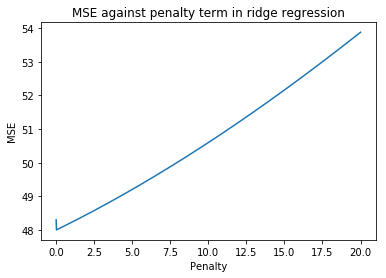

In [520]:
# For the 2nd fold
min_mse_rr(regression_train, 5, 1)

I now report the values of the penalty parameter obtained for the five folds.

In [521]:
folds = cross_val_evaluate(regression_train, 5)
penalty = np.linspace(0, 20, 10**4)
penalty = penalty[1:]
    
def min_mse_rr_Fold(data):
    
    X_train_subset, y_train_subset, X_val, y_val = data 
    val_scores = [] 

    for i in penalty: # loop over penalty values
        beta_ridge = ridge_estimate(X_train_subset, y_train_subset, i)
        y_pred_ridge = X_val @ beta_ridge  
        val_score = mse(y_val,y_pred_ridge)
        val_scores.append(val_score)
    location_min_mse = np.argmin(val_scores)
   # print("Fold ", folds)
    print("Penalty:", penalty[location_min_mse])
    return val_scores
results = map(min_mse_rr_Fold, folds) # use map to apply min_mse_rr_Fold function to each fold
m = np.array(list(results))
mse_mean = np.mean(m, axis=0)
optimal_penalty_loc = mse_mean.argmin() # find the location of the optimal penalty
optimal_penalty = penalty[optimal_penalty_loc] # find the corresponding optimal penalty
print("The optimal penalty is:", optimal_penalty)

Penalty: 10.21102110211021
Penalty: 0.002000200020002
Penalty: 9.894989498949895
Penalty: 0.002000200020002
Penalty: 4.934493449344934
The optimal penalty is: 1.45014501450145


To find the optimal penalty parameter, I first took the average MSE over the 5 folds, then found the minimum MSE and then took the corresponding penalty parameter. We will need the optimal penalty in the next part of the task.

#### 1.2.2
In this task, I obtain the in-sample MSE by retraining the model using the optimal penalty parameter on the
entire training set (found in the task above), and I also compute its out-of-sample MSE (on the test set regression_test.csv).

In [522]:
# MSE in-sample
X_train_r = regression_train.iloc[:,:-1]
y_train_r = regression_train.iloc[:,-1]
beta_ridge_opt = ridge_estimate(X_train_r, y_train_r, optimal_penalty)
y_pred_train = X_train_r @ beta_ridge_opt
MSE_in_sample_rr = mse(y_train_r, y_pred_train)
print("In-sample MSE:", MSE_in_sample_rr)

# MSE out-of-sample
X_test_r = regression_test.iloc[:,:-1]
y_test_r = regression_test.iloc[:,-1] 
y_pred_test = X_test_r @ beta_ridge_opt
MSE_out_of_sample_rr = mse(y_test_r, y_pred_test)
print("Out-of-sample MSE:", MSE_out_of_sample_rr)

In-sample MSE: 24.561211818092605
Out-of-sample MSE: 19.361771106788023


In task 1.1.2 where we used linear regression, I obtain 24.37 for the in-sample MSE and 19.56 for the out-of-sample MSE whereas in this task, using ridge regression, I obtain 24.56 or the in-sample MSE and 19.36. These are extremely similar which is quite surprising for 2 reasons:
1. In task 1.2.1, we used cross validation. Cross validation is a method used to deal with overfitting hence we expect to get better results.
2. Ridge regression is a technique that is mean to reduce the overall MSE. So althought there is some bias, the overall MSE should decrease.

Similarly to above, I stadardise the data to see if I get more "normal" results:

In [523]:
# changing from dataframes to arrays
X_train_r = np.array(regression_train.iloc[:,:-1]) 
y_train_r = np.array(regression_train.iloc[:,-1])
X_test_r = np.array(regression_test.iloc[:,:-1])
y_test_r = np.array(regression_test.iloc[:,-1])

# standarding the train set besides the first column (as it is the intercept column)
X_train_std = np.delete(standardise(X_train_r), obj=0, axis=1)
X_test_std = np.delete(standardise(X_test_r), obj=0, axis=1)

# append back the 1s onto the standardised X
X_train = np.c_[X_train_r[:,0],X_train_std]
X_test = np.c_[X_test_r[:,0],X_test_std]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [524]:
# MSE in-sample
beta_ridge_opt = ridge_estimate(X_train, y_train_r, optimal_penalty)
y_pred_train = X_train @ beta_ridge_opt
MSE_in_sample_rr = mse(y_train_r, y_pred_train)
print("In-sample MSE:", MSE_in_sample_rr)

# MSE out-of-sample
y_pred_test = X_test @ beta_ridge_opt
MSE_out_of_sample_rr = mse(y_test_r, y_pred_test)
print("Out-of-sample MSE:", MSE_out_of_sample_rr)

In-sample MSE: 24.561498465984066
Out-of-sample MSE: 25.99491592074952


Indeed the out-of-sample MSE is bigger than the in-sample MSE. A difference we can note compared with linear regression is that the difference between the in-sample and out-of-sample MSE for ridge regression (24.56 and 25.99) is slightly smaller then the same difference in linear regression (24.34 and 26.62). This suggests that the ridge model perfoms ever so slightly better which is expected as we have used cross-validation and have added the penalty term.

### 1.3 Regression with K nearest neighbours (KNN)
#### 1.3.1
I now repeat task 1.2.1 employing the kNN algorithm as a regression model. Using one of the folds: I will first demonstrate the process by which you scan over a range of k to find your optimal value within this
range; and secondly, examine both the MSE and the distribution of the errors obtained on the corresponding
validation subset.

The error is defined as $e = y - \hat{y}$ where $\hat{y} = X\beta$.

In [525]:
# Changing from dataframes to arrays
X_train_r = np.array(regression_train.iloc[:,:-1]) 
y_train_r = np.array(regression_train.iloc[:,-1])
X_test_r = np.array(regression_test.iloc[:,:-1])
y_test_r = np.array(regression_test.iloc[:,-1])

# Standarding the train set besides the first column (as it is the intercept column)
X_train_std = np.delete(standardise(X_train_r), obj=0, axis=1)
X_test_std = np.delete(standardise(X_test_r), obj=0, axis=1)

# Append back the 1s onto the standardised X
X_train = np.c_[X_train_r[:,0],X_train_std]
X_test = np.c_[X_test_r[:,0],X_test_std]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [526]:
def euclidian_distance(p, q):
    return np.sqrt(np.sum((p-q)**2, axis=1))

In [527]:
def k_neighbours(X_test, X_train, k, return_distance=False):
  n_neighbours = k
  dist = []
  neigh_ind = []
  
  # compute distance from each point x_text in X_test to all points in X_train
  point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

  # determine which k training points are closest to each test point
  for row in point_dist:
      enum_neigh = enumerate(row)
      sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

      ind_list = [tup[0] for tup in sorted_neigh]
      dist_list = [tup[1] for tup in sorted_neigh]

      dist.append(dist_list)
      neigh_ind.append(ind_list)
  
  # return distances together with indices of k nearest neighbouts
  if return_distance:
      return np.array(dist), np.array(neigh_ind)
  
  return np.array(neigh_ind)

In [528]:
# define a predicting function called reg_predict
def reg_predict(X_test, X_train, y_train, k):
  # each of the k neighbours contributes equally to the classification of any data point in X_test  
  neighbours = k_neighbours(X_test, X_train, k=k)
  # compute mean over neighbours labels
  y_pred_kNN = np.array([np.mean(y_train[neighbour]) for neighbour in neighbours])
    
  return y_pred_kNN

In [529]:
# splitting the folds into training and validation data 
def cross_val_evaluate(data, num_folds):
  folds = cross_val_split(data, num_folds) # split the data
  
  fold_split = [] # [(xtrain, ytrain, xval, yval), (xtrain, ytrain, xtest, ytest)]
  for i in range(len(folds)):
    # define the training set
    train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
    train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
    X_train_subset = train_folds[:,:-1]
    y_train_subset = train_folds[:, -1]
    
    # define the validation set
    val_fold = folds[i]
    X_val = val_fold[:,:-1]
    y_val = val_fold[:, -1]

    fold_split.append((X_train_subset, y_train_subset, X_val, y_val))
  return fold_split

Below, I demonstrate the process by which you scan over a range of k to find the optimal value within this range; and secondly, I examine both the MSE and the distribution of the errors obtained on the corresponding validation subset. I do this for fold 3.

In [530]:
def mse_error_kNN(data, num_folds):
    
    X_train_subset, y_train_subset, X_val, y_val = cross_val_evaluate(data, num_folds)[2] # fold 3 
    empty_mse = np.zeros(20)
    empty_errors = []

    for k in range(1,21):
            y_pred_kNN = reg_predict(X_val, X_train_subset, y_train_subset, k)
            mse_kNN = mse(y_val, y_pred_kNN) # calculating mse
            empty_mse[k-1] = mse_kNN
            error_kNN = y_val - y_pred_kNN # calculating errors
            empty_errors.append(error_kNN)
    
    plt.figure(figsize = [10, 15])
    
    plt.subplot(2, 1, 1) 
    plt.plot(range(1,21), empty_mse)
    plt.xlabel("k")
    plt.ylabel("MSE")
    plt.title("MSE against k parameter in kNN for 5 folds")
    
    plt.subplot(2, 1, 2)
    plt.hist(empty_errors,bins=25)
    plt.xlabel("Distribution")
    plt.ylabel("Size of error")
    plt.title("MSE against k parameter in kNN for 5 folds")
    
    return empty_mse

array([0.0666858 , 0.04536486, 0.05610901, 0.06338753, 0.06888438,
       0.07594045, 0.08368271, 0.08207064, 0.08855804, 0.09303032,
       0.10709379, 0.10371979, 0.11333862, 0.11542015, 0.11839117,
       0.12303717, 0.1254932 , 0.12988213, 0.13396991, 0.1364631 ])

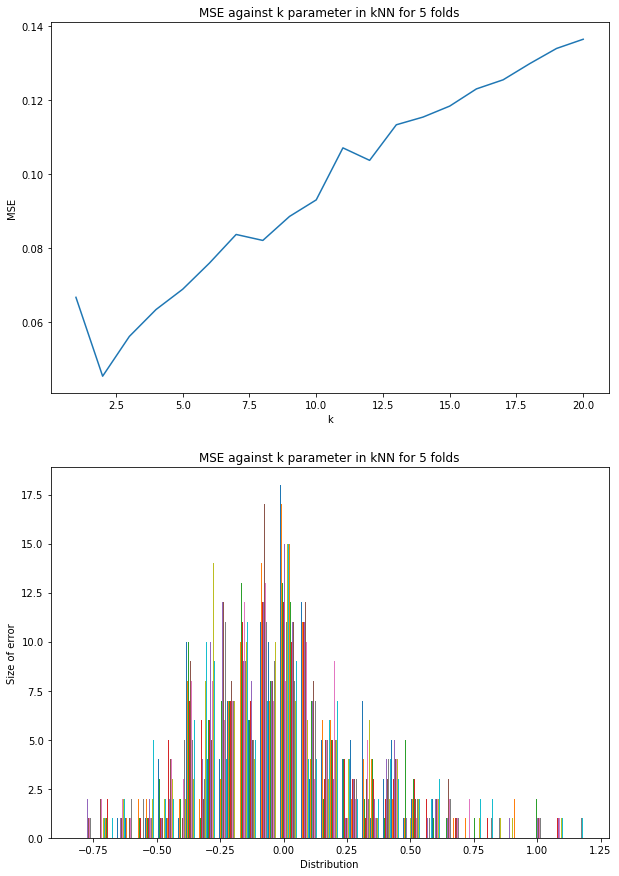

In [531]:
mse_error_kNN(X_train, 5)

From the two graphs above, there are several observations we can make with regards to the MSE and the distribution of the errors. Firstly, looking at the top graph, we see that the MSE reaches a minimum when k = 2, and from there onwards, the MSE increases as k increases. The optimal k for kNN is therefore 2. 
Now if we look at the bottom graph, it appears that the errors are normally distributed about 0 (with mean 0) and with a standard deviation of approximately 1. As we increase the value of k, I don't seem to see any pattern with the distribution of the errors.



#### 1.3.2
Lastly, I obtain the in-sample MSE by retraining the model using the optimal penalty parameter on the
entire training set, and compute its out-of-sample MSE (on the test set regression_test.csv).
I firstly obtain the optimal k parameter over all folds. I use the same technique as I did in ridge regression, first finding the average MSE over all folds, find the minimum and then take the corresponding k term.

The optimal k is 2


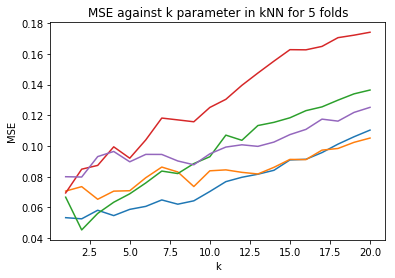

In [532]:
folds = cross_val_evaluate(X_train , 5)

def runFold_mse(data):
    
    X_train_subset, y_train_subset, X_val, y_val = data 
    empty_mse = np.zeros(20)
    
    for k in range(1,21):
            y_pred_kNN = reg_predict(X_val, X_train_subset, y_train_subset, k)
            mse_kNN = mse(y_val, y_pred_kNN) # calculating mse
            empty_mse[k-1] = mse_kNN # appending mse values     
    plt.plot(range(1,21), empty_mse)
    plt.xlabel("k")
    plt.ylabel("MSE")
    plt.title("MSE against k parameter in kNN for 5 folds")
    return empty_mse
results = map(runFold_mse, folds) # applying runFold_mse over the 5 folds
m = np.array(list(results))
msemean = np.mean(m, axis=0)
optimal_k = msemean.argmin() + 1 # add 1 for index  
print("The optimal k is", optimal_k)

In [533]:
# MSE in-sample
y_pred_train_kNN = reg_predict(X_train, X_train, y_train_r, optimal_k)
MSE_in_sample_kNN = mse(y_train_r, y_pred_train_kNN)
print("In-sample MSE:", MSE_in_sample_kNN)

# MSE out-of-sample
y_pred_test_kNN = reg_predict(X_test, X_train, y_train_r, optimal_k)
MSE_out_of_sample_kNN = mse(y_test_r, y_pred_test_kNN)
print("Out-of-sample MSE:", MSE_out_of_sample_kNN)

In-sample MSE: 3.970810643564356
Out-of-sample MSE: 18.544779411764708


kNN seems to perform the best out of the 3 models because it has both the lowest in-sample and out-of-sample MSEs. However, there is quite a significant difference between in-sample and out-of-sample MSE: there is a difference of roughly 14 in kNN whereas only 2 in linear and ridge regression.

## Task 2: Classification

### 2.1 Logistic Regression
#### 2.1.1
In this task, we train a logistic regression classifier on the training data with gradient descent for 5000
iterations. We use a grid-search with 5-fold cross validation to find the optimal set of hyperparameters (learning rate, decision threshold).

In [534]:
# load data as pandas data frames
classification_train = pd.read_csv('classification_train.csv', header=None) 
classification_test = pd.read_csv('classification_test.csv', header=None) 

X_train_c = np.array(classification_train.iloc[:,:-1]) 
X_train_c_T = np.array(classification_train.iloc[:,:-1].T) 
y_train_c = np.array(classification_train.iloc[:,-1])
X_test_c = np.array(classification_test.iloc[:,:-1])
y_test_c = np.array(classification_test.iloc[:,-1]) 

In [535]:
# implementing the logistic function
def logistic(x):
    return 1/(1+np.exp(-x))

In [536]:
def predict_log(X, beta, beta_0):
  y_log = logistic(beta.T @ X + beta_0) 
  return y_log

In [537]:
# this function initialises the beta terms to zeros
def initialise(d):
  """    
  Argument:
  d: size of the beta vector (or number of parameters)
  
  Returns:
  beta: initialised vector of shape (d, 1)
  beta_0: initialised scalar (corresponds to the offset)
  """
  
  beta = np.zeros(shape=(d, 1), dtype=np.float32)
  beta_0 = 0
  
  assert(beta.shape==(d, 1))
  assert(isinstance(beta_0, float) or isinstance(beta_0, int))
  
  return beta, beta_0

In [538]:
def propagate(X, y, beta, beta_0):
    """
    Arguments:
    X: data of size (d, n)
    y: true label vector of size (1, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar
  
    Returns:
    cost: negative log-likelihood cost for logistic regression
    dbeta: gradient of the loss with respect to beta
    dbeta_0: gradient of the loss with respect to beta_0
    """
    n = X.shape[1]
    y_log = predict_log(X, beta, beta_0) #.T
    y_log.shape
    y.shape

  # cost function
    cost = (-1) * np.mean(np.multiply(y, np.log(y_log)) + np.multiply(1-y, np.log(1 - y_log)), axis=1)

  # derivatives
    dbeta = (1/n) * X @ np.transpose(y_log - y)  # dbeta = (1/n) * X @ np.transpose(y_log - y)
    dbeta_0 = np.mean(y_log - y)
    
    assert(dbeta.shape==beta.shape)
    assert(dbeta_0.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape==())
  
  # store gradients in a dictionary
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
    return grads, cost

In [539]:
# gradient descent with 5000 itration
def optimise(X, y, beta, beta_0, learning_rate, num_iterations=5000, print_cost=False):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar
  num_iterations: number of iterations gradient descent shall update the parameters
  learning_rate: step size in updating procedure
  print_cost: whether to print the cost every 100 iterations or not

  Returns:
  params: dictionary containing the parameters beta and offset beta_0
  grads: dictionary containing the gradients
  costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
  """
  costs = []
    
  for i in range(num_iterations):

      # calculate cost and gradients
      grads, cost = propagate(X, y, beta, beta_0)
      
      # retrieve derivatives from grads
      dbeta = grads["dbeta"]
      dbeta_0 = grads["dbeta_0"]
      
      # updating procedure
      beta = beta - learning_rate * dbeta 
      beta_0 = beta_0 - learning_rate * dbeta_0
      
      # record the costs
      if i % 100 == 0:
          costs.append(cost)
      
      # print the cost every 100 iterations
      if print_cost and i % 100 == 0:
          print ("cost after iteration %i: %f" %(i, cost))
  
  # save parameters and gradients in dictionary
  params = {"beta": beta, "beta_0": beta_0}
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return params, grads, costs

In [540]:
def predict(X_test, decision_threshold, beta, beta_0):
  """
  Arguments:
  X_test: test data of size (d, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  y_pred: vector containing all binary predictions (0/1) for the examples in X_test
  """
  n = X_test.shape[1]
  y_pred = np.zeros((1,n))
  beta = beta.reshape(X_test.shape[0], 1)
  
  # compute vector y_log predicting the probabilities
  y_log = predict_log(X_test, beta, beta_0)
  
  for i in range(y_log.shape[1]):
      
      # convert probabilities y_log to actual predictions y_pred
      if y_log[0, i] > decision_threshold:
          y_pred[0, i] = 1 
      else:
          y_pred[0, i] = 0
  
  assert(y_pred.shape==(1, n))
  
  return y_pred

In [541]:
def model(X_train, y_train, X_test, y_test, learning_rate, decision_threshold, num_iterations=5000, print_cost=False):
  # initialize parameters with zeros
  beta, beta_0 = initialise(X_train.shape[0])

  # gradient descent
  parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, learning_rate, num_iterations, print_cost=False)

  # retrieve parameters beta and beta_0 from dictionary "parameters"
  beta = parameters["beta"]
  beta_0 = parameters["beta_0"]

  # predict test and train set examples
  y_pred_test = predict(X_test, decision_threshold, beta, beta_0)
  y_pred_train = predict(X_train, decision_threshold, beta, beta_0)

  train_accuracy = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
  test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100

  # print train/test Errors
  #print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
  #print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

  # saving all information
  d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations, "train_accuracy": train_accuracy, "test_accuracy": test_accuracy}
  
  return d

We now use a grid search which is a tool to find the optimal hyperparameters. This methods works by considering different combinations of parameters and chooses the one that will return the lowest error. The two hyperparameter we are optimizing are the learning rate and the decision threshold. I chose learning rates and decision thresholds that range between 0 and 1. Based on what I have seen in the coding tasks and in literature, these seem like resonable ranges. We will therefore have a 10 x 10 grid of possible hyperparameter values and we will look for the pair that has the smallest mean squared error. This will correspond to the optimal hyperparameters. I show this example for one of the folds below and then I do it over the 5 folds in the cell after. These code chuncks do take a bit of time to compute (especially the second one).

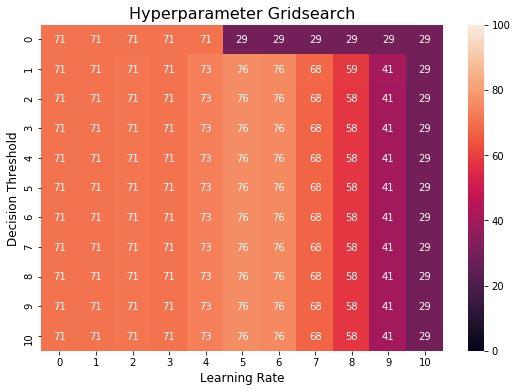

In [542]:
# learning_rate choices     
learning_rates = np.linspace(0,1,11)
      
# decision threshold choices     
decision_thresholds  = np.linspace(0,1,11)

accuracies = np.zeros((11,11))
folds = cross_val_evaluate(classification_train , 5)
X_train_subset, y_train_subset, X_val, y_val = folds[4]

for i in range(len(learning_rates)):         
    for j in range(len(decision_thresholds)): 
        d = model(X_train_subset.T, y_train_subset, X_val.T, y_val, learning_rate=learning_rates[i], decision_threshold=decision_thresholds[j], num_iterations=5000, print_cost=False)
        accuracies[i,j] = d["test_accuracy"]

# plot heatmap
import seaborn as sns
fix, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(accuracies, vmin=0, vmax=100, annot=True)
ax.set_title('Hyperparameter Gridsearch', fontsize=16)
ax.set_ylabel('Decision Threshold', fontsize=12)
ax.set_xlabel('Learning Rate', fontsize=12)
plt.show()

In [543]:
hyperparameters = []
for i in learning_rates:
    for j in decision_thresholds:
        hyperparameters.append((i,j)) 

folds = cross_val_evaluate(classification_train , 5)

def optimalhyperparameters(data):
    
    X_train_subset, y_train_subset, X_val, y_val = data 
    accuracies = np.zeros(len(hyperparameters))   
    
    for i in range(len(hyperparameters)):
        d = model(X_train_subset.T, y_train_subset, X_val.T, y_val, learning_rate=hyperparameters[i][0], decision_threshold=hyperparameters[i][1], num_iterations=5000, print_cost=False)
        accuracies[i] = d["test_accuracy"]
    return accuracies
results = map(optimalhyperparameters, folds)
matrix_hyperparameters = np.array(list(results))
mean_hyperparameters = np.mean(matrix_hyperparameters, axis=0)
optimal_hyperparameters = mean_hyperparameters.argmax() 
print("The optimal learning rate is", hyperparameters[optimal_hyperparameters][0])
print("The optimal decision threshold is", hyperparameters[optimal_hyperparameters][1])

The optimal learning rate is 0.1
The optimal decision threshold is 0.5


#### 2.1.2
Compare the performance of your optimal model on the training data and on the test data by
their mean accuracies.

In [546]:
X_train_c = np.array(classification_train.iloc[:,:-1]) 
y_train_c = np.array(classification_train.iloc[:,-1])
X_test_c = np.array(classification_test.iloc[:,:-1])
y_test_c = np.array(classification_test.iloc[:,-1])

d = model(X_train_c.T, y_train_c, X_test_c.T, y_test_c, num_iterations=5000, learning_rate=0.1, decision_threshold=0.5, print_cost=False)
      
print("train accuracy:", d["train_accuracy"])
print("test accuracy:", d["test_accuracy"])

train accuracy: 74.25
test accuracy: 74.0


As expected, the test accuracy is slighly lower than the train accuracy, this is because we have trained the model with the training data hence the optimal hyperparameters are more adapted to it.

### 2.2 Random forest
#### 2.2.1
Train a random forest classifier on the training data. You should use the same 5-fold cross
validation subsets to explore and optimise over suitable ranges of the following hyperparameters: (i)
number of decision trees; (ii) depth of trees, (iii) maximum number of descriptors (features) randomly
chosen at each split. Use cross-entropy as your information criterion for the splits.


The cross entropy equation I used is from the book "Elements of Statistical Learning" given by:
$$-\sum_{k=1}^K\hat{p}_{mk}\log{\hat{p}_{mk}}$$

where $\hat{p}_{mk}$ is the proportion of class k observations in node m.

In [485]:
X_train_c = np.array(classification_train.iloc[:,:-1]) 
y_train_c = np.array(classification_train.iloc[:,-1])
X_test_c = np.array(classification_test.iloc[:,:-1])
y_test_c = np.array(classification_test.iloc[:,-1])

In [486]:
# cross-entropy as the information criterion for the splits
def cross_entropy(y, sample_weights=None):
  """ 
  Calculate the cross-entropy for labels.
  Arguments:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (float): the cross-entropy for y.
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
  cross_entropy = 0
  num = y.shape[0]  # number of labels
  label_counts = {}  # caculate different labels in y，and store in label_counts
  for i in range(num):
      if y[i] not in label_counts.keys():
          label_counts[y[i]] = 0
      label_counts[y[i]] += sample_weights[i]
  
  for key in label_counts:
      prob = float(label_counts[key]) / float(np.sum(sample_weights))
      cross_entropy -= prob ** np.log2(prob)

  return cross_entropy

In [487]:
def split_dataset(X, y, column, value, sample_weights=None):
  Return the split of data whose column-th feature equals value.
  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      column: the column of the feature for splitting.
      value: the value of the column-th feature for splitting.
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (np.array): the subset of X whose column-th feature equals value.
      (np.array): the subset of y whose column-th feature equals value.
      (np.array): the subset of sample weights whose column-th feature equals value.
  """ 
  ret = []
  featVec = X[:, column] # take one of the features of X
  X = X[:,[i for i in range(X.shape[1]) if i!=column]] # 2 list comprehensions : = all samples != means not the same
    # take all the colums expect the one we have defined in the featVec (feature vector)
  
  for i in range(len(featVec)):
      if featVec[i] > value:
          ret.append(i) 
      elif featVec[i] < value:
        ret.append(i)
  
  sub_X = X[ret,:]
  sub_y = y[ret]
  sub_sample_weights = sample_weights[ret]

  return sub_X, sub_y, sub_sample_weights

In [492]:
def cross_purification(X, y, column, sample_weights=None):
  """
  Calculate the resulted gini impurity given a vector of features.
  Arguments:
      X: training features, of shape (N, D). N is the number of samples we have and D is the dimensionality 
      y: vector of training labels, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (float): the resulted gini impurity after splitting by this feature.
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0] # all samples have the same weight (every sample is as influencial as the other)
  
  new_impurity = 0
  old_cost = cross_entropy(y, sample_weights) # call previous function gini_impurity taking into account the uniform sample weights
  
  unique_vals = np.unique(X[:, column]) # take all the unique values of all samples of X (:) but only take it from the column "column" (only take the feature of X that we want to consider at the moment), np.unique means you only take the unique values from that
  new_cost = 0.0
  # split the values of i-th feature and calculate the cost 
  for value in unique_vals: # iterate over the unique values HERE PROBABLY HAVE TO CHANGE VALUE
      sub_X, sub_y, sub_sample_weights = split_dataset(X, y, column, value, sample_weights) 
      prob = np.sum(sub_sample_weights) / float(np.sum(sample_weights)) 
      new_cost += prob * cross_entropy(sub_y, sub_sample_weights) # if some samples have a bigger weight, you want this to be reflected in the new cost which is why you multiply by prob
  
  new_impurity = old_cost - new_cost # information gain

  return new_impurity

In [493]:
# evaluate for feature in the 4th column
cross_purification(X_train_c, y_train_c, column=3)

36.540920518035385

In [494]:
## EDIT THIS FUNCTION
def choose_best_feature(X, y, sample_weights=None):
  """
  Choose the best feature to split according to criterion.
  Args:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the column for the best feature
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]

  best_feature_idx = 0
  n_features = X.shape[1]    
  
  # use C4.5 algorirhm
  best_gain_cost = 0.0
  for i in range(n_features):
      info_gain_cost = cross_purification(X, y, i, sample_weights)         
      if info_gain_cost > best_gain_cost:
          best_gain_cost = info_gain_cost
          best_feature_idx = i                

  return best_feature_idx

In [495]:
# evaluate which feature is best
choose_best_feature(X_train_c, y_train_c)

2

In [496]:
def majority_vote(y, sample_weights=None):
  """
  Return the label which appears the most in y.
  Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the majority label
  """
  if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]
  
  majority_label = y[0]

  dict_num = {}
  for i in range(y.shape[0]):
      if y[i] not in dict_num.keys():
          dict_num[y[i]] = sample_weights[i]
      else:
          dict_num[y[i]] += sample_weights[i]
  
  majority_label = max(dict_num, key=dict_num.get)
  # end answer
  return majority_label

In [497]:
# evaluate it
majority_vote(y_train_c)

1.0

In [498]:
# EDIT THIS FUNCTION - probably have to chnage something here for continuous data
def build_tree(X, y, feature_names, depth, sample_weights=None, max_depth=10, min_samples_leaf=2):
  """Build the decision tree according to the data.
  Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (dict): a dict denoting the decision tree. 
      Example:
          The first best feature name is 'title', and it has 5 different values: 0,1,2,3,4. For 'title' == 4, the next best feature name is 'pclass', we continue split the remain data. If it comes to the leaf, we use the majority_label by calling majority_vote.
          mytree = {
              'titile': {
                  0: subtree0,
                  1: subtree1,
                  2: subtree2,
                  3: subtree3,
                  4: {
                      'pclass': {
                          1: majority_vote([1, 1, 1, 1]) # which is 1, majority_label
                          2: majority_vote([1, 0, 1, 1]) # which is 1
                          3: majority_vote([0, 0, 0]) # which is 0
                      }
                  }
              }
          }
  """
  mytree = dict()

  # include a clause for the cases where (i) no feature, (ii) all lables are the same, (iii) depth exceed, or (iv) X is too small
  if len(feature_names)==0 or len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf: 
      return majority_vote(y, sample_weights)
  
  else:
    best_feature_idx = choose_best_feature(X, y, sample_weights)  # find the index of the best feature
    best_feature_name = feature_names[best_feature_idx]
    feature_names = feature_names[:]
    feature_names.remove(best_feature_name)
    
    mytree = {best_feature_name:{}} # define a dictionary inside a dictionary
    unique_vals = np.unique(X[:, best_feature_idx])
    for value in unique_vals:
        sub_X, sub_y, sub_sample_weights = split_dataset(X, y, best_feature_idx, value, sample_weights)  ## <-- SOLUTION
        mytree[best_feature_name][value] = build_tree(sub_X, sub_y, feature_names, depth+1, sub_sample_weights)  ## <-- SOLUTION (hint: use depth+1 as the depth)

    return mytree

In [499]:
X_train_c = classification_train.iloc[:,:-1] 

In [500]:
def train(X, y, sample_weights=None):
  """
  Build the decision tree according to the training data.
  Args:
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      sample_weights: weights for each samples, of shape (N,).
  """
  if sample_weights is None:
      # if the sample weights is not provided, we assume the samples have uniform weights
      sample_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
      sample_weights = np.array(sample_weights) / np.sum(sample_weights)

  feature_names = X.columns.tolist()
  X = np.array(X)
  y = np.array(y)
  tree = build_tree(X, y, feature_names, depth=1, sample_weights=sample_weights)
  return tree

In [501]:
# fit the decision tree with training data
tree = train(X_train_c, y_train_c)

KeyboardInterrupt: 

In [ ]:
def classify(tree, x):
  """
  Classify a single sample with the fitted decision tree.
  Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
  Returns:
      (int): predicted testing sample label.
  """
  feature_name = list(tree.keys())[0] # first element
  second_dict = tree[feature_name]            
  key = x.loc[feature_name]
  if key not in second_dict:
      key = np.random.choice(list(second_dict.keys()))
  value_of_key = second_dict[key]
  if isinstance(value_of_key, dict):
      label = classify(value_of_key, x)
  else:
      label=value_of_key
  return label

In [ ]:
def predict(tree,X):
  """
  Predict classification results for X.
  Args:
      X: (pd.Dataframe) testing sample features, of shape (N, D).
  Returns:
      (np.array): predicted testing sample labels, of shape (N,).
  """
  if len(X.shape)==1:
      return classify(tree, X)
  else:
      results=[]
      for i in range(X.shape[0]):
          results.append(classify(tree, X.iloc[i, :]))
      return np.array(results)

Now that we have all the decision tree algorithm, we can move onto building the random forest algorithm. I begin with the bootstrapping step where I sample with replacement to introduce some randomness.

In [503]:
# function that returns the bootstrapped data frame
def bootstrapping(training_dataset, B): # B is the number of sample
    bootstrap_indeces = np.random.randint(low = 0, high = len(training_dataset), size = B)
    bootstrap_df = training_dataset.iloc[bootstrap_indeces]
    return bootstrap_df
    

In [505]:
# start with number of sample equal to B = X_train_c.shape[0]
bootstrapping(classification_train, X_train_c.shape[0])

,0,1,2,3,4,5,6,7,8,9,10,11
288,0.117647,0.50,0.067899,1.00,0.50,0.333333,0.000000,0.000000,0.107143,0.666667,1.0,0.0
771,0.294118,0.50,0.071641,0.00,0.75,0.666667,0.000000,0.666667,0.232143,0.666667,0.0,1.0
632,0.647059,0.50,0.534280,0.00,0.25,0.000000,0.333333,0.666667,0.125000,0.666667,1.0,0.0
624,0.294118,1.00,0.107131,1.00,0.75,1.000000,1.000000,0.666667,0.428571,0.666667,1.0,1.0
768,0.161765,0.50,0.240618,0.25,0.50,0.666667,0.333333,0.333333,0.375000,1.000000,1.0,0.0
454,0.117647,1.00,0.063772,0.00,1.00,1.000000,0.666667,0.000000,0.625000,0.666667,0.0,1.0
702,0.117647,0.50,0.111643,1.00,0.50,1.000000,1.000000,1.000000,0.321429,0.666667,1.0,1.0
365,0.382353,0.50,0.114614,0.50,1.00,1.000000,0.333333,0.666667,0.196429,1.000000,0.0,1.0
741,0.117647,1.00,0.063387,0.50,0.75,0.666667,1.000000,0.666667,0.321429,0.666667,1.0,1.0
302,0.205882,0.50,0.027512,0.00,0.00,1.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.0


#### 2.2.2
Compare the performance of your optimal model on the training data and on the test data using
different measures computed from the confusion matrix.

In [255]:
def tp_tn_fp_fn(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == -1) & (y_pred == -1))
    fp = sum((y_true == 1) & (y_pred == -1))
    fn = sum((y_true == -1) & (y_pred == 1))
    return tp, tn, fp, fn

def precision(tp, fp):
    return (tp * 100)/float(tp + fp)

def recall(tp, fn):
    return (tp * 100)/float(tp + fn)

def f1_score(y_true, y_pred):
    tp, tn, fp, fn = tp_tn_fp_fn(y_true, y_pred)
    precisions = precision(tp, fp)/100
    recalls = recall(tp, fn)/100
    f1_score = (2 * precisions * recalls)/(precisions + recalls)
    return f1_score

### 2.3 Support vector machines (SVMs)
#### 2.3.1
This task will deal with two hard margin SVM classifiers : (i) Implement the standard linear SVM
with hard margin on the training data; (ii) implement a hard margin kernel SVM with radial basis function
(RBF) kernel, and demonstrate that you have used a grid-search with 5-fold cross validation (same folds
as above) to find the RBF kernel with the optimal hyperparameter with respect to the F1-score.
Compare the results of the linear SVM and the optimal kernel SVM.


SVM enables us to solve binary classification problems. Here it will serve us to predict the decision of the banker as to whether the applicant is granted a credit or not.
There are 11 predictors in this problem.

Our goal will be to find a hyperplane that will optimally seperate samples into 2 classes - class "1" and class "-1" (I replaced the 0s in the classification data to -1s). To achieve this, we need to find parameters W and b, which parametise the hyperplane.

In this section, we use the soft margin SVM to approximate the hard margin in the limit because with large enough regularization strength $C$, soft margin approximates hard margin SVM. This is because, with a large C, more importance is given to avoiding misclassification which is what hard-margin classification aims to do. I chose $C=10000$. The objective function we have to minimize in soft-margin SVMs is:
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol w \cdot x_i + b) \bigg) \, .
$$
where $\boldsymbol w$ is the vector of weights, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s.

In [547]:
# load data as pandas data frames
classification_train = pd.read_csv('classification_train.csv', header=None) # 800 x 12 matrix
classification_test = pd.read_csv('classification_test.csv', header=None) # 200 x 12 matrix

# split data
X_train_c = classification_train.iloc[:,:-1]
y_train_c = classification_train.iloc[:,-1]
X_test_c = classification_test.iloc[:,:-1]
y_test_c = classification_test.iloc[:,-1]

# replace the 0s with -1s (output variable)
y_train_c = np.where(y_train_c == 0, -1, y_train_c) 
y_test_c = np.where(y_test_c == 0, -1, y_test_c)

# standardize
X_train_c = standardise(X_train_c)
X_test_c = standardise(X_test_c)

# insert 1 in every row for intercept b
X_train_c = np.c_[np.ones((X_train_c.shape[0], 1)), X_train_c]
X_test_c = np.c_[np.ones((X_test_c.shape[0], 1)), X_test_c]

In [548]:
# W is the vector normal to the hyperplane
def compute_cost(W, X, y, regul_strength=10000):
  n = X.shape[0]
  distances = 1 - y * (np.dot(X, W))
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * (np.sum(distances) / n) 

  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge
  return cost

In [549]:
# calculate gradient of cost, in the SVM algorithm, we minimize the cost function.
def calculate_cost_gradient(W, X_batch, y_batch, regul_strength=10000):
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch])  # gives multidimensional array

  distance = 1 - (y_batch * np.dot(X_batch, W))
  dw = np.zeros(len(W))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = W
      else:
          di = W - (regul_strength * y_batch[ind] * X_batch[ind])
      dw += di

  dw = dw/len(y_batch)  # average
  return dw

In [550]:
# stochastic gradience descent function to update the weights iteratively with a given learning rate alpha
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=10000, print_outcome=False):
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle([X, y])
      for ind, x in enumerate(X):
          ascent = calculate_cost_gradient(weights, x, y[ind], regul_strength)
          weights = weights - (learning_rate * ascent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
          # compute cost
          cost = compute_cost(weights, X, y, regul_strength)
          if print_outcome:
            print("Iteration is: {}, Cost is: {}".format(iteration, cost))
          # stop criterion
          if abs(prev_cost - cost) < stop_criterion * prev_cost:
              return weights
          
          prev_cost = cost
          nth += 1
  
  return weights

In [551]:
# train the model, takes a bit of time to compute
W = sgd(X_train_c, y_train_c, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, regul_strength=10000, print_outcome=True)
print("Training finished.")
W

Iteration is: 1, Cost is: 217148.62032416498
Iteration is: 2, Cost is: 174825.06865086342
Iteration is: 4, Cost is: 274786.27423515136
Iteration is: 8, Cost is: 204602.20641614526
Iteration is: 16, Cost is: 281249.53158207884
Iteration is: 32, Cost is: 216660.52076973073
Iteration is: 64, Cost is: 222937.9713573361
Iteration is: 128, Cost is: 179689.6563925721
Iteration is: 256, Cost is: 203074.43778767652
Iteration is: 512, Cost is: 218470.9355421231
Iteration is: 1024, Cost is: 163204.94569968566
Iteration is: 1999, Cost is: 216096.4831536729
Training finished.


array([ 30.64408161,  -4.15787275,  67.99800951,  -2.45255382,
        18.98589257, -19.01662827, -14.38889498,   7.51232364,
         0.41285016, -16.77793641,  22.63421632, -32.60308648])

In [552]:
# function to evaluate the mean accuracies in both train and test set
def score(W, X, y):
  y_preds = np.array([])
  for i in range(X.shape[0]):
    y_pred = np.sign(np.dot(X[i], W))
    y_preds = np.append(y_preds, y_pred)
  
  return y_preds, np.float(sum(y_preds==y)) / float(len(y))

In [553]:
print("Accuracy on train set: {}".format(score(W, X_train_c, y_train_c)[1]))
print("Accuracy on test set: {}".format(score(W, X_test_c, y_test_c)[1]))

Accuracy on train set: 0.6175
Accuracy on test set: 0.645


We now implement a hard margin kernel SVM with radial basis function (RBF) kernel to tacked the problem of linear inseparability of the data. Here is the function for the radial basis kernel I use:
$$k(X,W) = \exp^\frac{-\lvert\lvert x-w \lvert\lvert^2}{\sigma}$$
I replace some of the dot products from the linear SVM by the kernel function.  

In [554]:
# create kernel function (here radial basis function)
def rbf(X, W, alpha): # for a matrix X, this will return a vector
    norm = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        norm[i] = np.dot((X[i] - W),(X[i] - W))
    k = np.exp(-1 / alpha * norm)
    return k

def rbf2(X, W, alpha): # for a vector X, this will return a number
    norm = (X - W).T @ (X - W)
    k = np.exp(-1 / alpha * norm)
    return k

In [555]:
# kernel cost function
def compute_cost_kernel(W, X, y, alpha, regul_strength=10000):
  n = X.shape[0]
  distances = 1 - y * (rbf(X, W, alpha))
  distances[distances < 0] = 0  # equivalent to max(0, distance)
  hinge = regul_strength * (np.sum(distances) / n) 

  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge
  return cost

In [556]:
# calculate gradient of cost
def calculate_cost_gradient_kernel(W, X_batch, y_batch, alpha, regul_strength=10000):
  # if only one example is passed
  if type(y_batch) == np.float64:
      y_batch = np.asarray([y_batch])
      X_batch = np.asarray([X_batch]) 

  distance = 1 - (y_batch * rbf(X_batch, W, alpha))
  dw = np.zeros(len(W))

  for ind, d in enumerate(distance):
      if max(0, d)==0:
          di = W
      else:
          di = W - 2/alpha*(regul_strength * rbf2(X_batch[ind], W, alpha)* y_batch[ind] * (X_batch[ind] - W)) # new gradient
      dw += di

  dw = dw/len(y_batch)  # average
  return dw

In [557]:
# stochastic gradience descent function to update the weights iteratively
def sgd_kernel(X, y, alpha, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-3, regul_strength=10000, print_outcome=False):
  # initialise zero weights
  weights = np.zeros(X.shape[1])
  nth = 0
  # initialise starting cost as infinity
  prev_cost = np.inf
  
  # stochastic gradient descent
  for iteration in range(1, max_iterations):
      # shuffle to prevent repeating update cycles
      np.random.shuffle([X, y])
      for ind, x in enumerate(X):
          ascent = calculate_cost_gradient_kernel(weights, x, y[ind], alpha, regul_strength)
          weights = weights - (learning_rate * ascent)

      # convergence check on 2^n'th iteration
      if iteration==2**nth or iteration==max_iterations-1:
          # compute cost
          cost = compute_cost_kernel(weights, X, y, alpha, regul_strength)
          if print_outcome:
            print("Iteration is: {}, Cost is: {}".format(iteration, cost))
          # stop criterion
          if abs(prev_cost - cost) < stop_criterion * prev_cost:
              return weights
          
          prev_cost = cost
          nth += 1
  
  return weights

In [558]:
# train the model
W_kernel = sgd_kernel(X_train_c, y_train_c, alpha=i, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=10000, print_outcome=False)

In [559]:
def score_kernel(W, X, y):
  y_preds = np.array([])
  for i in range(X.shape[0]):
    y_pred = np.sign(np.dot(X[i], W)) # do not replace dot product here as it does not apply to kernel
    y_preds = np.append(y_preds, y_pred)
  
  return y_preds, np.float(sum(y_preds==y)) / float(len(y))

In [560]:
y_pred_kernel = score_kernel(W_kernel, X_test_c, y_test_c)[0]
y_pred_kernel

array([ 1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [561]:
# TESTING FOR 1 FOLD - THIS WORKS!
alphas = np.linspace(0, 3, 10**2)
alphas = alphas[1:]

def optimal_alpha(data, n_folds):
    
    X_train_subset, y_train_subset, X_val, y_val = cross_val_evaluate(data, n_folds)[1]
    f1_scores = []
   
    for i in alphas:
        W_kernel = sgd_kernel(X_train_subset, y_train_subset, alpha=i, max_iterations=2000, stop_criterion=0.05, learning_rate=1e-5, regul_strength=10000, print_outcome=False)
        y_preds = score_kernel(W_kernel, X_train_subset, y_train_subset)[0]
        f1 = f1_score(y_train_subset, y_preds)
        f1_scores.append(f1)
    return y_preds, f1_scores

I now use a grid-search with 5-fold cross validation to find the RBF kernel with the optimal hyperparameter with respect to the F1-score.

In [563]:
classification_train = np.where(classification_train == 0, -1, classification_train)
folds = cross_val_evaluate(classification_train, 5)
alphas = np.linspace(0, 3, 10**2)
alphas = alphas[1:]

def optimal_alpha(data):
    
    X_train_subset, y_train_subset, X_val, y_val = data 
    f1_scores = []
   
    for i in alphas:
        W_kernel = sgd_kernel(X_train_subset, y_train_subset, alpha=i, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=10000, print_outcome=False)
        y_pred = score_kernel(W_kernel, X_train_subset, y_train_subset)[0]
        f1 = f1_score(y_train_subset, y_pred)
        f1_scores.append(f1)
    return f1_scores

results = map(optimal_alpha, folds) # use map to apply optimal_alpha function to each fold
matrix_f1_scores = np.array(list(results))
mean_f1_scores = np.mean(matrix_f1_scores, axis=0)
optimal_alpha_loc = mean_f1_scores.argmax() 
optimal_alpha =  alphas[optimal_alpha_loc]
print("The optimal hyperparameter alpha is", optimal_alpha)

The optimal hyperparameter alpha is 0.6666666666666667


To compare the results of the linear SVM and the optimal kernel SVM, I evaluate the f1-score and the mean accuracy of both on the test data.

In [564]:
# linear SVM model
y_pred_linear = score(W, X_test_c, y_test_c)[0]
f1_linear = f1_score(y_test_c, y_pred_linear)
print("The F1-score for linear SVM is", f1_linear)
print("Accuracy on test set with linear SVM: {}".format(score(W, X_test_c, y_test_c)[1]))

# train the kernel SVM model using optimal hyperparameter
W_kernel = sgd_kernel(X_train_c, y_train_c, alpha=optimal_alpha, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=10000, print_outcome=False)
y_pred_kernel = score_kernel(W_kernel, X_test_c, y_test_c)[0]
f1_kernel = f1_score(y_test_c, y_pred_kernel)
print("The F1-score for kernel SVM is", f1_kernel)
print("Accuracy on test set with kernel SVM: {}".format(score_kernel(W_kernel, X_test_c, y_test_c)[1]))

The F1-score for linear SVM is 0.7320754716981132
Accuracy on test set with linear SVM: 0.645
The F1-score for kernel SVM is 0.7936507936507936
Accuracy on test set with kernel SVM: 0.675


From the F1-scores and the accuracy above, the kernel SVM appears to perform better than linear SVM. This makes sence because kernel functions are meant to help when the data is not linearly separable. 

#### 2.3.2
Evaluate the performance of the RBF SVM on the test data over the range of the
hyperparameter of the kernel and represent the results using a receiver operating characteristic (ROC)
curve . Use this ROC curve to evaluate the quality of the optimal kernel SVM obtained in 2.3.1 through
cross-validation on the training set.

The ROC curve will allow us to interpret how good or bad a binary classifier works.

In [565]:
tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

NameError: name 'tp' is not defined